# Become a Data Analyst in Italy

In this project, we will see how and why to become a data analyst in Italy. Coming from academia, it may seems very difficult to find a job in a company as data analyst. However, it can be worth persevering in the moving. Don't believe me? Just look below! 

## How many job postings and where

*Methodology*

1. Get data
2. Explore dataframe
3. Filter for `job_country` 
4. Count based on `job_location`

### Import Libraries and Data

A big thank you to Luke Barousse for the data. 
You can install libreries you are missing by typing from the terminal window: \
`conda install datasets pandas matplotlib adjustText`

In [1]:
# Import Libraries
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### Filter Data and Remove Duplicates

Filter the data for the italian market and/or for the data analyst position. Remove reposted jobs for the same position from the same company.

In [59]:
df_it = df[df['job_country']=='Italy'].drop_duplicates(subset=["job_title","company_name"]).copy()
df_DA = df[df['job_title_short']=='Data Analyst'].drop_duplicates(subset=["job_title","company_name"]).copy()
df_DA_it = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='Italy')].drop_duplicates(subset=["job_title","company_name"]).copy()

# Further cleaning data
df_DA_it.loc[:, 'job_location'] = df_DA_it['job_location'].apply(lambda x: x.replace(' Capital','') if 'Capital' in x else x)
df_DA_it.loc[:, 'job_location'] = df_DA_it['job_location'].apply(lambda x: x.replace('Anywhere','Remote') if x == 'Anywhere' else x)

### Count Job Postings per Location

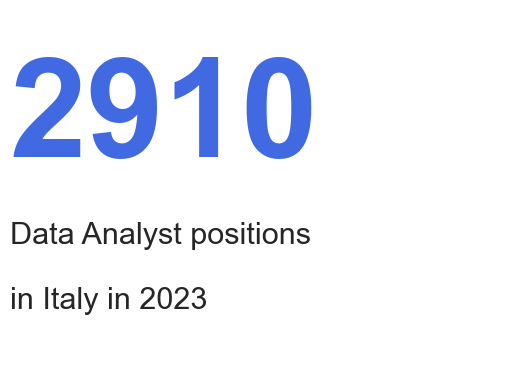

In [65]:
n_post = len(df_DA_it)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.text(0, 0.7, f'{n_post}',
    horizontalalignment='left',
    verticalalignment='center',
    color='royalblue',
    fontsize=100, weight='bold', clip_on=True)

ax.text(0, 0.3, 'Data Analyst positions\n\nin Italy in 2023',
    horizontalalignment='left',
    verticalalignment='center',
    fontsize=22, clip_on=True)



plt.axis('off')
plt.show()

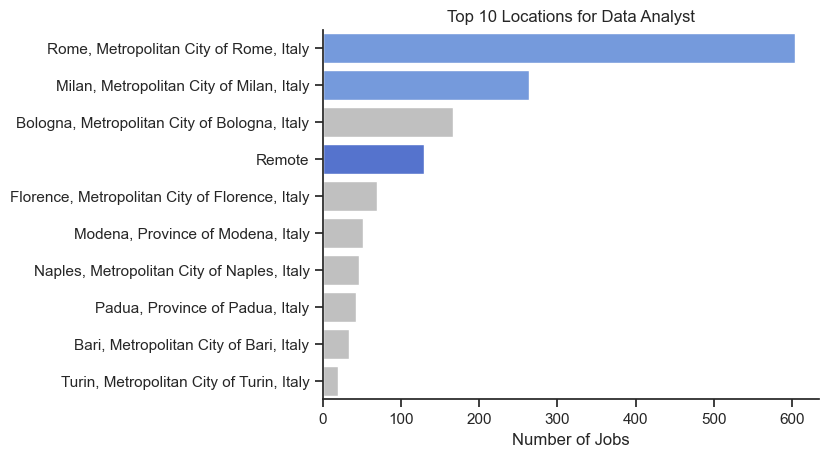

In [93]:
# Remove unspecified location
df_site = df_DA_it[df_DA_it['job_location']!='Italy']
df_site = df_site['job_location'].value_counts().head(10).to_frame()

#cols = ['silver' if (x != 'Remote') else 'royalblue' for x in df_site.index]
cols = ['']*len(df_site.index)
for i,city in enumerate(df_site.index):
    if city == 'Remote':
        cols[i] = 'royalblue'
    elif df_site.loc[city,'count']>200:
        cols[i] = 'cornflowerblue'
    else:
        cols[i] = 'silver'

sns.set_theme(style='ticks')
sns.barplot(data=df_site, x='count',y='job_location',hue='job_location',palette=cols,legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Top 10 Locations for Data Analyst')
plt.show()

In [ ]:
#if we want to count appearence of 'SQL' in job_skill, since it is a list, we have to loop along rows and search in each list
#explode function split the list in rows with equal values in the other coloumns
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

df_exploded= df.explode('job_skills')
#we can also run value_counts
df.explode('job_skills').value_counts('job_skills')

df_exploded.value_counts('job_skills').head(10).plot(kind='bar')

skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
# skill_count is now a series, to transform into a dataframe
df_skills_count = skills_count.reset_index() #so it adds new indexes and the old ones becomes a new column
df_skills_count = skills_count.reset_index(name='skill_count') #to also rename the counts column which before was without a name and so the new standard name would be 0

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

#visualize top 10 for Data Analyst
job_title='Data Analyst'
top_skills=10

df_final_skill = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)
df_final_skill.plot(kind='barh',x='job_skills',y='skill_count')
#to reverse the y axis
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} Skills for {job_title}")
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()





job_titles=['Data Scientist', 'Data Analyst', 'Data Engineer']

fig, ax = plt.subplots(3,1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i], title=f"{job_title}")
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000) #otherwise data analist has different xlim


fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

## What are the most demanded skills for Data Analyst?

*Methodology*

1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skills percentage
4. Plot final findings

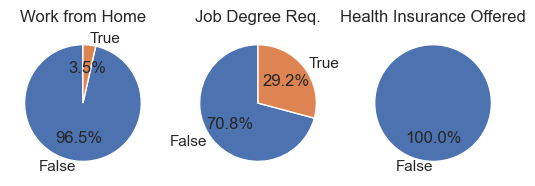

In [27]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}


def n_labels(column):
    if len(column.unique())==2:
        return['False','True']
    elif len(column.unique()==1):
        return['False']
    

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_it[column].value_counts(), startangle=90, autopct='%1.1f%%',labels=n_labels(df_DA_it[column]))
    ax[i].set_title(title)

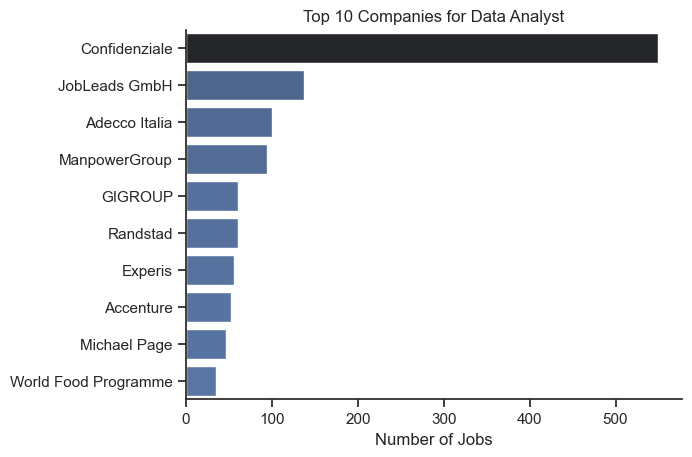

In [28]:
df_plot = df_DA_it['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Top 10 Companies for Data Analyst')
plt.show()

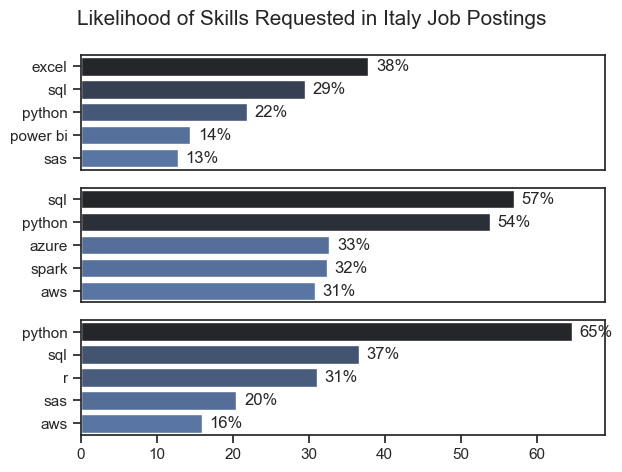

In [56]:
df_it_exploded= df_it.explode('job_skills').copy()

df_job_total_count = df_it['job_title_short'].value_counts().reset_index(name='jobs_total')


skills_count = df_it_exploded.groupby(['job_title_short','job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count') #to also rename the counts column which before was without a name and so the new standard name would be 0
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skill_perc = pd.merge(df_skills_count,df_job_total_count, how='left',on='job_title_short')
df_skill_perc['skill_percent'] = 100 * df_skill_perc['skill_count']/df_skill_perc['jobs_total']  

job_titles = df_skills_count['job_title_short'].unique()[:3].tolist()
job_titles = sorted(job_titles)

fig, ax = plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,69)

    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center') 

    if i!=len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Italy Job Postings', fontsize=15)
fig.tight_layout()
plt.show()

In [57]:
df_DA_it['job_posted_month_no'] = df_DA_it['job_posted_date'].dt.month
df_DA_it_exploded = df_DA_it.explode('job_skills')
df_DA_it_pivot = df_DA_it_exploded.pivot_table(index='job_posted_month_no',columns='job_skills', aggfunc='size', fill_value=0)
df_DA_it_pivot.loc['Total'] = df_DA_it_pivot.sum()
df_DA_it_pivot = df_DA_it_pivot[df_DA_it_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_it_pivot = df_DA_it_pivot.drop('Total')

DA_totals = df_DA_it.groupby('job_posted_month_no').size()
df_DA_it_percent = df_DA_it_pivot.div(DA_totals/100,axis=0)

df_DA_it_percent = df_DA_it_percent.reset_index()
df_DA_it_percent['job_posted_month'] = df_DA_it_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_it_percent = df_DA_it_percent.set_index('job_posted_month')
df_DA_it_percent = df_DA_it_percent.drop(columns='job_posted_month_no')



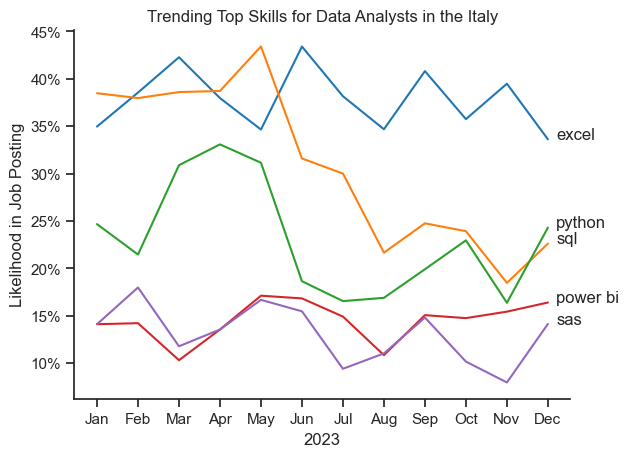

In [73]:

df_plot = df_DA_it_percent.iloc[:,:5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
plt.title('Trending Top Skills for Data Analysts in Italy')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i], df_plot.columns[i])

ax = plt.gca()

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
sns.despine()
plt.show()

In [74]:
df_it_no_na = df_it.dropna(subset='salary_year_avg')

job_titles = df_it_no_na['job_title_short'].unique()[:6].tolist()
df_it_top6 = df_it_no_na[df_it_no_na['job_title_short'].isin(job_titles)]
job_order = df_it_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

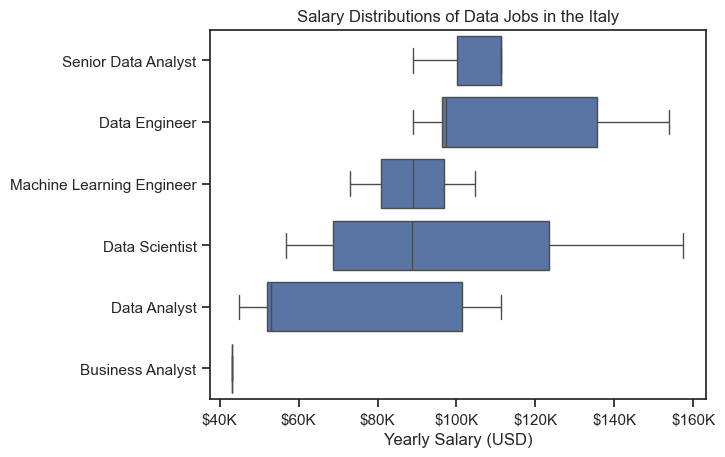

In [79]:
sns.boxplot(data=df_it_top6,x='salary_year_avg',y='job_title_short',order=job_order)
#plt.boxplot(job_list,labels=job_titles, vert=False) #it needs a list of series/columns and a list of labels
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.title('Salary Distributions of Data Jobs in the Italy')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.show()

In [85]:
df_DA_it_no_na = df_DA_it.dropna(subset='salary_year_avg').copy()
df_DA_it_no_na = df_DA_it_no_na.explode('job_skills')
df_DA_top_pay = df_DA_it_no_na.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_skills = df_DA_it_no_na.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10)
df_DA_skills = df_DA_skills.sort_values(by='median',ascending=False)



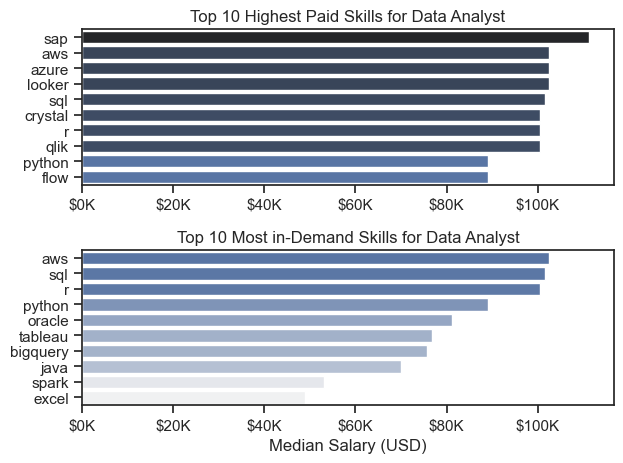

In [89]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index, ax=ax[0],hue='median',palette='dark:b_r')

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index, ax=ax[1],hue='median',palette='light:b')
ax[1].set_xlim(ax[0].get_xlim()) #put same xlim of the other ax
ax[1].set_title('Top 10 Most in-Demand Skills for Data Analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
fig.tight_layout()
plt.show()

In [ ]:
df_DA_skills = df_DA_it_no_na.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skills_count','median':'median_salary'})
DA_job_count = len(df_DA_it_no_na)

df_DA_skills['skill_percent'] = df_DA_skills['skills_count']/DA_job_count *100
skill_percent = 2.5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent']>skill_percent]


In [109]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict



{'analyst_tools': ['microstrategy',
  'power bi',
  'excel',
  'spreadsheet',
  'word',
  'visio',
  'powerbi',
  'splunk',
  'ssrs',
  'tableau',
  'alteryx',
  'dax',
  'nuix',
  'ms access',
  'cognos',
  'ssis',
  'outlook',
  'qlik',
  'powerpoint',
  'sheets',
  'msaccess',
  'sap',
  'sharepoint',
  'looker',
  'datarobot',
  'sas',
  'esquisse',
  'spss'],
 'programming': ['c#',
  'delphi',
  'typescript',
  'powershell',
  'shell',
  'ocaml',
  'nosql',
  'matlab',
  'python',
  'apl',
  'dart',
  'rust',
  'c',
  'objective-c',
  'ruby',
  'solidity',
  'lisp',
  'crystal',
  'scala',
  'fortran',
  'golang',
  'php',
  'erlang',
  'sql',
  'bash',
  'cobol',
  'javascript',
  'html',
  'lua',
  'groovy',
  'c++',
  'visualbasic',
  'mongodb',
  'mongo',
  't-sql',
  'kotlin',
  'vb.net',
  'r',
  'elixir',
  'julia',
  'css',
  'haskell',
  'f#',
  'java',
  'assembly',
  'go',
  'swift',
  'perl',
  'no-sql',
  'pascal',
  'sas',
  'visual basic',
  'vba',
  'sass',
  'cloj

In [112]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_plot = df_DA_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills')

In [110]:
df_DA_skills_high_demand

,skills_count,median_salary,skill_percent
job_skills,,,
python,7,89100.0,17.073171
sql,6,101500.0,14.634146
tableau,4,76757.0,9.756098
r,3,100500.0,7.317073
oracle,2,81094.5,4.878049
bigquery,2,75757.0,4.878049
excel,2,49007.0,4.878049
java,2,70057.0,4.878049


In [113]:
df_technology

,technology,skills
0,analyst_tools,microstrategy
0,analyst_tools,power bi
0,analyst_tools,excel
0,analyst_tools,spreadsheet
0,analyst_tools,word
...,...,...
9,sync,symphony
9,sync,microsoft teams
9,sync,webex
9,sync,slack


In [114]:
df_plot

,skills_count,median_salary,skill_percent,technology,skills
0,7,89100.0,17.073171,programming,python
1,6,101500.0,14.634146,programming,sql
2,4,76757.0,9.756098,analyst_tools,tableau
3,3,100500.0,7.317073,programming,r
4,2,81094.5,4.878049,cloud,oracle
5,2,75757.0,4.878049,cloud,bigquery
6,2,49007.0,4.878049,analyst_tools,excel
7,2,70057.0,4.878049,programming,java


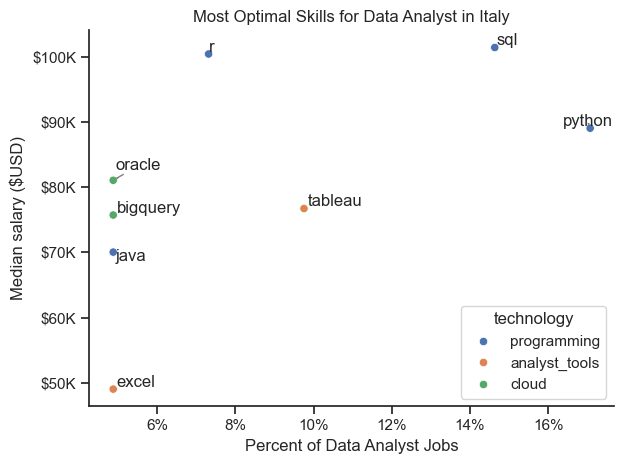

In [116]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

#df_plot.plot(kind='scatter',x='skill_percent',y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
    )

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.ylabel('Median salary ($USD)')
plt.xlabel('Percent of Data Analyst Jobs')
plt.title('Most Optimal Skills for Data Analyst in Italy')
texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray',lw=1))
plt.tight_layout()
sns.despine()
sns.set_theme(style='ticks')
plt.show()